Load your Dataset

In [1]:
documents = open("dataset.txt").readlines()

In [2]:
documents = [x[:-1] for x in documents]
documents

['university of AmirKabir',
 'The quick brown fox jumps over the lazy dog.',
 'The lazy dog is jumped over by a quick brown fox.',
 'A fox that is brown in color jumps over a dog that is lazy.',
 'A lazy dog has a quick brown fox jumping over it.',
 'The quick brown fox leaps over the dog that is lazy.',
 'A brown-colored fox jumps over a dog that is lazy.',
 'The dog that is lazy is leapt over by a fox that is quick and brown.',
 'The quick and brown fox jumps over the dog that is not very active.',
 'A quick and brown-colored fox jumps over a dog that is lethargic.',
 'The lazy dog has a quick and brown fox that jumps over it.',
 'The fox that is brown in color jumps over the lazy dog.',
 'A brown-colored fox jumps over a dog that is not very active.',
 'A quick brown fox is seen jumping over a lazy dog.',
 'The dog that is lazy has a quick and brown fox jumping over it.',
 'A quick and brown fox jumps over the dog that is not very energetic.',
 'The lazy dog has a fox that is quick 

In [3]:
num_minhash = 20
band_size = 10
K = 5

shingled example of "university of AmirKabir" with K = 2

un, ni, iv, ve, er, rs, si, it, ty, y , o, of, f , A, Am, mi, ir, rK, Ka, ab, bi, ir

In [4]:
def create_shingle(docs: str, k: int):
    """
    :param docs: Entire documents list
    :param k: Shingle size
    :return: A set of k-shingles
    """
    shingle_set = []
    #TODO-Task1: start your code
    for line in docs:
        d1 = set()
        for i in range(len(line) - k + 1):
            d1.add(line[i:i + k])
            shingle_set.append(d1)
    #end your code
    return shingle_set

In [5]:
documents_shingles = create_shingle(documents, k=K)
print(documents_shingles[2])

{'rKabi', 'AmirK', 'niver', 'Kabir', 'of Am', 'versi', 'y of ', ' of A', 'irKab', 'sity ', ' Amir', 'ersit', 'ivers', 'unive', 'mirKa', 'ty of', 'rsity', 'f Ami', 'ity o'}


dont change this part just run it

In [6]:
res1 = {'of Am', ' of A', 'ty of', 'f Ami', 'irKab', ' Amir', 'unive', 'mirKa', 'y of ', 'ivers', 'rsity', 'sity ',
        'versi', 'ersit', 'ity o', 'rKabi', 'niver', 'Kabir', 'AmirK'}
assert res1 == documents_shingles[0], "Test 1 Failed!"
print("Test 1 Successful!")

Test 1 Successful!


Now that we have our three shingles we create a shingle vocabulary by create a `union` between all three sets.

In [7]:
vocab = set()
for shingle in documents_shingles:
    vocab.update(shingle)

print(vocab)

{'ox is', 'y a f', 'apt o', 'n col', 'rown ', ' ener', 'y is ', ' by t', 'tive.', ' quic', 'ng ov', 'fox i', 'A fox', 'ng do', 'wn in', 'ver t', 'uick.', 'or ju', 'very ', ' is q', 'y ene', 'y has', ' seen', 'umpin', 'A bro', ' is l', 'ty of', ' not ', 'energ', 'mps o', 'n fox', 'a fox', 'the d', 'wn ju', 'lor i', 'ed fo', 'ry ac', 'ery a', 'hat i', 'lor j', 'e sle', 'is se', 'is br', 'erget', 'ver a', 's laz', 'g ove', 'the s', 'eapt ', 'has a', ' asle', 'ed ov', 'hargi', 'ped o', 'aping', 's a q', 'ps ov', 'er a ', 'sleep', 'he qu', 'er it', 'jumps', ' that', 'r is ', 'in co', ' of A', 'irKab', 'sity ', ' brow', 'n in ', 's lea', 'is le', 'getic', 'ivers', 'mirKa', 'lazy ', 'a laz', 's not', 'zy ha', 'is sl', 'livel', ' a qu', ' live', ' a la', 'fox l', 'rown-', 'he fo', 'nd br', 'nerge', ' leth', 'own j', 'The l', 'azy i', 'ck ju', 'dog i', 'eep i', 'e fox', 'etic.', 'ery l', 'umps ', 'ver i', 'olor ', ' Amir', 'n-col', 'quick', 'd bro', 'y dog', 'over ', 'r lea', ' acti', 'activ', 

In [8]:
def create_sparse_vectors(documents_shingles, vocab):
    """

    :param documents_list:
    :param vocab: Union of all shingles sets (type: List)
    :return: sparse vector matrix: on-hot ecoded of all sentences
    desired result for two sentences could be:
    [
     [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
    ]
    """
    sparse_vector_matrix = []
    #TODO-Task2: start your code
    shingle_to_index = {shingle: i for i, shingle in enumerate(vocab)}

    # Initialize the sparse vector matrix with zeros
    sparse_vector_matrix = [[0] * len(vocab) for _ in range(len(documents_shingles))]

    # Set the appropriate elements to 1 for each sentence
    for i, shingles in enumerate(documents_shingles):
        for shingle in shingles:
            j = shingle_to_index[shingle]
            sparse_vector_matrix[i][j] = 1

    #end your code
    return sparse_vector_matrix

In [9]:
input_matrix = create_sparse_vectors(documents_shingles, vocab)
input_matrix

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


So we now have one-hot encoded sparse vectors we can move onto *minhashing*.

## Minhashing

In [10]:
def create_hash_fucntion(size: int):
    """
    Build a Permutation p (hash function) with mentioned size

    :param size: Length of hash function
    :return: A list of hash of length size
    desired result could be:
    [
     [5,8,4,1,2,...,78]
    ]
    """
    hash_func = []
    #TODO-Task3: start your code
    from random import shuffle
    hash_func = []
    hash_func = list(range(1, size + 1))
    shuffle(hash_func)

    #end your code

    return hash_func

In [11]:
def create_minhash_functions(num_minhash: int, vocab_size: int):
    """

    :param num_minhash:
    :param vocab_size:
    :return: list of minhash functions
    """
    minhashes = []
    for i in range(num_minhash):
        minhashes.append(create_hash_fucntion(vocab_size))

    return minhashes

In [12]:
min_hashes = create_minhash_functions(num_minhash, len(vocab))
min_hashes

[[117,
  256,
  178,
  233,
  158,
  291,
  92,
  148,
  65,
  285,
  193,
  245,
  47,
  54,
  174,
  173,
  247,
  302,
  39,
  225,
  125,
  97,
  73,
  186,
  70,
  288,
  177,
  250,
  277,
  31,
  139,
  165,
  168,
  298,
  199,
  127,
  89,
  24,
  40,
  23,
  198,
  120,
  171,
  276,
  74,
  211,
  26,
  265,
  161,
  267,
  274,
  238,
  21,
  83,
  17,
  237,
  268,
  259,
  219,
  218,
  248,
  154,
  208,
  50,
  128,
  229,
  34,
  130,
  152,
  22,
  261,
  119,
  258,
  48,
  284,
  272,
  227,
  81,
  164,
  242,
  235,
  275,
  295,
  55,
  244,
  221,
  131,
  191,
  132,
  166,
  61,
  293,
  88,
  222,
  59,
  99,
  241,
  224,
  106,
  195,
  167,
  145,
  9,
  162,
  6,
  179,
  18,
  204,
  307,
  91,
  266,
  264,
  41,
  243,
  42,
  38,
  190,
  217,
  150,
  176,
  240,
  12,
  20,
  71,
  212,
  205,
  104,
  194,
  90,
  207,
  27,
  159,
  110,
  271,
  294,
  286,
  78,
  124,
  297,
  93,
  105,
  56,
  201,
  121,
  231,
  160,
  14,
  278,
  69,
  44

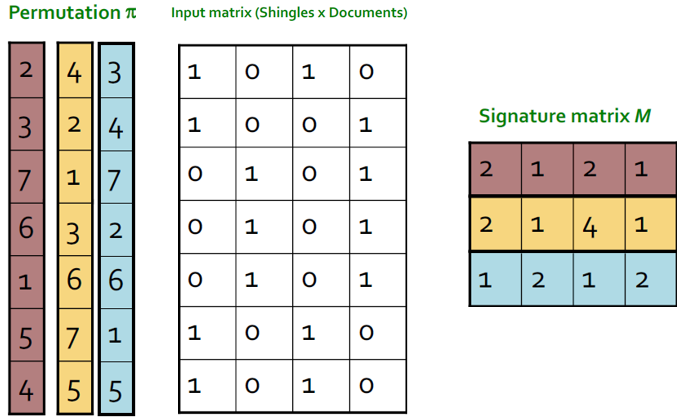

In [1]:
# don't run this cell.
from IPython.display import Image
Image(filename='lsh.png')

In [13]:
def create_signature_matrix(minhash_functions, sparse_vector_matrix):
    """

    :param minhash_functions:
    :param sparse_vector_matrix:
    :return: signature matrix
    """
    M = []
    #TODO-Task4: start your code
    for vector in sparse_vector_matrix:
        signature = []
        for func in minhash_functions:
            for i in range(1, len(func) + 1):
                idx = func.index(i)
                signature_val = vector[idx]
                if signature_val == 1:
                    signature.append(idx)
                    break
        M.append(signature)
    #end your code

    return M

In [14]:
signature_matrix = create_signature_matrix(min_hashes, input_matrix)
signature_matrix

[[102,
  265,
  231,
  67,
  190,
  65,
  144,
  73,
  65,
  144,
  73,
  253,
  115,
  73,
  283,
  144,
  65,
  283,
  147,
  73],
 [102,
  265,
  231,
  67,
  190,
  65,
  144,
  73,
  65,
  144,
  73,
  253,
  115,
  73,
  283,
  144,
  65,
  283,
  147,
  73],
 [102,
  265,
  231,
  67,
  190,
  65,
  144,
  73,
  65,
  144,
  73,
  253,
  115,
  73,
  283,
  144,
  65,
  283,
  147,
  73],
 [102,
  265,
  231,
  67,
  190,
  65,
  144,
  73,
  65,
  144,
  73,
  253,
  115,
  73,
  283,
  144,
  65,
  283,
  147,
  73],
 [102,
  265,
  231,
  67,
  190,
  65,
  144,
  73,
  65,
  144,
  73,
  253,
  115,
  73,
  283,
  144,
  65,
  283,
  147,
  73],
 [102,
  265,
  231,
  67,
  190,
  65,
  144,
  73,
  65,
  144,
  73,
  253,
  115,
  73,
  283,
  144,
  65,
  283,
  147,
  73],
 [102,
  265,
  231,
  67,
  190,
  65,
  144,
  73,
  65,
  144,
  73,
  253,
  115,
  73,
  283,
  144,
  65,
  283,
  147,
  73],
 [102,
  265,
  231,
  67,
  190,
  65,
  144,
  73,
  65,
  144,
  7

In [15]:
def jaccard(a, b):
    """

    :param a:
    :param b:
    :return: Number of common values in a and b
    """
    a = set(a)
    b = set(b)
    result = 0
    #TODO-Task5: start your code
    result = len(a.intersection(b)) / len(a.union(b))
    #end your code
    return result

In [16]:
t1 = {'a', 'b', 'c'}
t2 = {'a', 'b', 'd'}
assert jaccard(t1, t2) == 0.5, "Task5 faild"
print("task5 successful")

task5 successful


In [17]:
jaccard(signature_matrix[2], signature_matrix[1])

1.0

In [18]:
def create_bands(signatures, band_size):
    bands = []
    for signature in signatures:
        r = len(signature) // band_size

        sub_bands = []
        for i in range(0, len(signature), r):
            sub_bands.append(signature[i: i + r])
        bands.append(sub_bands)
    return bands

In [19]:
bands = create_bands(signature_matrix, band_size)
bands

[[[102, 265],
  [231, 67],
  [190, 65],
  [144, 73],
  [65, 144],
  [73, 253],
  [115, 73],
  [283, 144],
  [65, 283],
  [147, 73]],
 [[102, 265],
  [231, 67],
  [190, 65],
  [144, 73],
  [65, 144],
  [73, 253],
  [115, 73],
  [283, 144],
  [65, 283],
  [147, 73]],
 [[102, 265],
  [231, 67],
  [190, 65],
  [144, 73],
  [65, 144],
  [73, 253],
  [115, 73],
  [283, 144],
  [65, 283],
  [147, 73]],
 [[102, 265],
  [231, 67],
  [190, 65],
  [144, 73],
  [65, 144],
  [73, 253],
  [115, 73],
  [283, 144],
  [65, 283],
  [147, 73]],
 [[102, 265],
  [231, 67],
  [190, 65],
  [144, 73],
  [65, 144],
  [73, 253],
  [115, 73],
  [283, 144],
  [65, 283],
  [147, 73]],
 [[102, 265],
  [231, 67],
  [190, 65],
  [144, 73],
  [65, 144],
  [73, 253],
  [115, 73],
  [283, 144],
  [65, 283],
  [147, 73]],
 [[102, 265],
  [231, 67],
  [190, 65],
  [144, 73],
  [65, 144],
  [73, 253],
  [115, 73],
  [283, 144],
  [65, 283],
  [147, 73]],
 [[102, 265],
  [231, 67],
  [190, 65],
  [144, 73],
  [65, 144],
  [

In [20]:
def get_candidate_pairs(doc_index, bands):
    candidateds_ids = []
    for i in range(len(bands)):
        if i == doc_index:
            continue
        current_band = bands[doc_index]
        target_band = bands[i]
        for current_row, target_row in zip(current_band, target_band):
            if current_row == target_row:
                candidateds_ids.append(i)
                break

    return candidateds_ids

In [21]:
target_id = 2

In [22]:
candidates = get_candidate_pairs(target_id, bands)
candidates

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [23]:
print("Target sentence")
print(documents[target_id])

Target sentence
The lazy dog is jumped over by a quick brown fox.


In [24]:
print("Candidate sentences")
for index in candidates:
    print(documents[index])


Candidate sentences
university of AmirKabir
The quick brown fox jumps over the lazy dog.
A fox that is brown in color jumps over a dog that is lazy.
A lazy dog has a quick brown fox jumping over it.
The quick brown fox leaps over the dog that is lazy.
A brown-colored fox jumps over a dog that is lazy.
The dog that is lazy is leapt over by a fox that is quick and brown.
The quick and brown fox jumps over the dog that is not very active.
A quick and brown-colored fox jumps over a dog that is lethargic.
The lazy dog has a quick and brown fox that jumps over it.
The fox that is brown in color jumps over the lazy dog.
A brown-colored fox jumps over a dog that is not very active.
A quick brown fox is seen jumping over a lazy dog.
The dog that is lazy has a quick and brown fox jumping over it.
A quick and brown fox jumps over the dog that is not very energetic.
The lazy dog has a fox that is quick and brown jumping over it.
The quick and brown-colored fox jumps over the dog that is not very l

In [25]:
def get_topk_similar(trget_id, candidates, k):
    """

    :param trget_id:
    :param candidates:
    :return: k most similar sentences from candidates to target sentence
    """
    result = []
    #TODO-Task6: start your code
    import pandas as pd
    df =pd.DataFrame(columns= ['val1', 'val2'])
    i=0
    for index in candidates:
        if index != trget_id:
            df.loc[i] = [documents[index], jaccard(documents[index], documents[target_id])]
            i += 1

    df = df.sort_values( by="val2",ascending=False)[:k]
    result = df[['val1']].values
    #end your code
    return result

In [26]:
print('Similar sentences:')
print(get_topk_similar(target_id, candidates, k=5))


Similar sentences:
[['The lazy dog has a quick and brown fox that jumps over it.']
 ['The lazy dog has a fox that is quick and brown jumping over it.']
 ['The quick brown fox jumps over the lazy dog.']
 ['The dog that is lazy has a quick and brown fox jumping over it.']
 ['A lazy dog has a quick brown fox jumping over it.']]
